# Project solutions

In [1]:
fragments = [
    "GAATTAGATAAATTCAAATTAGACTTAGGAAGGAATGTTCCCAATAGTAGACATAAAAGTCTTCGCACAGTGAAAACTAAAATGGATCAAGCAGATGATG",
    "TTCTTCAGAAGCTCCACCCTATAATTCTGAACCTGCAGAAGAATCTGAACATAAAAACAACAATTACGAACCAAACCTATTTAAAACTCCACAAAGGAAA",
    "TGCCTATTGGATCCAAAGAGAGGCCAACATTTTTTGAAATTTTTAAGACACGCTGCAACAAAGCAGATTTAGGACCAATAAGTCTTAATTGGTTTGAAGA",
    "CTCCACAAAGGAAACCATCTTATAATCAGCTGGCTTCAACTCCAATAATATTCAAAGAGCAAGGGCTGACTCTGCCGCTGTACCAATCTCCTGTAAAAGA",
    "CAACATTTTTTGAAATTTTTAAGACACGCTGCAACAAAGCAGATTTAGGACCAATAAGTCTTAATTGGTTTGAAGAACTTTCTTCAGAAGCTCCACCCTA",
    "GGCTGACTCTGCCGCTGTACCAATCTCCTGTAAAAGAATTAGATAAATTCAAATTAGACTTAGGAAGGAATGTTCCCAATAGTAGACATAAAAGTCTTCG",
    "CAAAGAGAGGCCAACATTTTTTGAAATTTTTAAGACACGCTGCAACAAAGCAGATTTAGGACCAATAAGTCTTAATTGGTTTGAAGAACTTTCTTCAGAA",
    "AGCAAGGGCTGACTCTGCCGCTGTACCAATCTCCTGTAAAAGAATTAGATAAATTCAAATTAGACTTAGGAAGGAATGTTCCCAATAGTAGACATAAAAG",
    "TCAGCTGGCTTCAACTCCAATAATATTCAAAGAGCAAGGGCTGACTCTGCCGCTGTACCAATCTCCTGTAAAAGAATTAGATAAATTCAAATTAGACTTA",
    "AATCTCCTGTAAAAGAATTAGATAAATTCAAATTAGACTTAGGAAGGAATGTTCCCAATAGTAGACATAAAAGTCTTCGCACAGTGAAAACTAAAATGGA",
    "ATGCCTATTGGATCCAAAGAGAGGCCAACATTTTTTGAAATTTTTAAGACACGCTGCAACAAAGCAGATTTAGGACCAATAAGTCTTAATTGGTTTGAAG",
    "GAATGTTCCCAATAGTAGACATAAAAGTCTTCGCACAGTGAAAACTAAAATGGATCAAGCAGATGATGTTTCCTGTCCACTTCTAAATTCTTGTCTTAGT"
]

In [2]:
def edit_distance(queryA, queryB):
    if queryA == queryB:
        return 0
    
    return 1
    
assert edit_distance('A', 'T') == 1
assert edit_distance('G', 'G') == 0

In [3]:
def merge(fragA, fragB):
    return fragA + fragB
    
assert merge("", "ATG") == "ATG"
assert merge("ATG", "") == "ATG"
assert merge("ATG", "CCT") == "ATGCCT"
assert merge("A", "TG") == "ATG"

In [4]:
def set_value_in_matrix(row, column, matrix, value):
    matrix[row][column] = value
    return matrix

def get_value_from_matrix(row, column, matrix):
    return matrix[row][column]
    
m = [[0, 1, 2], [3, 4, 5], [6, 7, 8]]
assert get_value_from_matrix(0, 1, set_value_in_matrix(0, 1, m, 5)) == 5
assert get_value_from_matrix(2, 0, set_value_in_matrix(2, 0, m, 81)) == 81
assert get_value_from_matrix(2, 2, set_value_in_matrix(2, 2, m, 112)) == 112

In [5]:
def create_matrix(inputA, inputB):
    row = [0] * (len(inputB) + 1)
    m = []
    for _ in range(len(inputA) + 1):
        m.append(row.copy())
    
    return m

assert create_matrix('','') == [[0]]
assert create_matrix('dn', 'a') == [[0, 0], [0, 0], [0, 0]]

In [6]:
def init_matrix(inputA, inputB):
    m = create_matrix(inputA, inputB)
    rows = len(inputA) + 1
    cols = len(inputB) + 1
    
    for i in range(rows):
        m[i][0] = i
        
    for j in range(cols):
        m[0][j] = j
    
    return m

assert init_matrix('', '') == [[0]]
assert init_matrix('dn', 'a') == [[0, 1], [1, 0], [2, 0]]

In [7]:
def edit_distance(queryA, queryB):
    m = init_matrix(queryA, queryB)
    rows = len(queryA) + 1
    cols = len(queryB) + 1

    for col in range(1, cols):
        for row in range(1, rows):
            if queryA[row - 1] == queryB[col - 1]:
                cost = 0
            else:
                cost = 1
            
            m[row][col] = min([m[row-1][col-1] + cost,
                               m[row][col - 1] + 1,
                               m[row - 1][col] + 1
                              ])
            
    return m[-1][-1]

assert edit_distance('A', 'T') == 1
assert edit_distance('G', 'G') == 0
assert edit_distance('kitten', 'sitting') == 3
assert edit_distance('', '') == 0
assert edit_distance('ABCD', 'EFGH') == 4
assert edit_distance('ABCD', 'ZBCZ') == 2

In [8]:
def sequence_identity(top, bottom):
    identity = 0
    for t, b in zip(top, bottom):
        if t == b:
            identity += 1
        
    return identity

assert sequence_identity("", "") == 0
assert sequence_identity("A", "A") == 1
assert sequence_identity("A", "T") == 0
assert sequence_identity("ATGC", "CGTA") == 0
assert sequence_identity("ATGC", "ATGC") == 4
assert sequence_identity("-AA-TG-C", "AA-TTGGG") == 3

In [9]:
def merge(top, bottom):
    merged = ""
    for t, b in zip(top, bottom):
        if t == "-":
            merged += b
        else:
            merged += t
            
    return merged

assert merge("A", "A") == "A"
assert merge("A", "T") == "A" or merge("A", "T") == "T"
assert merge("-A", "T-") == "TA"

In [10]:
from project import align, needleman_wunsch, score

def assemble(frags):
    n = len(frags)

    for _ in range(n - 1):
        # Generate all possible alignments
        # Generate each alignment with align(frag1, frag2, needleman_wunsch)
        alignments = {}
        for i, frag1 in enumerate(frags):
            for j in range(i + 1, len(frags)):
                frag2 = frags[j]
                alignments[(i, j)] = align(frag1, frag2, needleman_wunsch)
        
        # Pick the "best" alignment
        best_i, best_j = max(alignments, key=lambda k: score(alignments[k]))
        best = alignments[(best_i, best_j)]
        
        # Merge the best alignment into a contig
        contig = merge(best[0], best[1])
        
        # Remove fragments from best from alignments
        frags.pop(best_j)
        frags.pop(best_i)
        
        # Add contig to alignments
        frags.append(contig)
        
    return frags[0]

sequence = assemble(fragments.copy())
sequence

'ATGCCTATTGGATCCAAAGAGAGGCCAACATTTTTTGAAATTTTTAAGACACGCTGCAACAAAGCAGATTTAGGACCAATAAGTCTTAATTGGTTTGAAGAACTTTCTTCAGAAGCTCCACCCTATAATTCTGAACCTGCAGAAGAATCTGAACATAAAAACAACAATTACGAACCAAACCTATTTAAAACTCCACAAAGGAAACCATCTTATAATCAGCTGGCTTCAACTCCAATAATATTCAAAGAGCAAGGGCTGACTCTGCCGCTGTACCAATCTCCTGTAAAAGAATTAGATAAATTCAAATTAGACTTAGGAAGGAATGTTCCCAATAGTAGACATAAAAGTCTTCGCACAGTGAAAACTAAAATGGATCAAGCAGATGATGTTTCCTGTCCACTTCTAAATTCTTGTCTTAGT'

<BarContainer object of 420 artists>

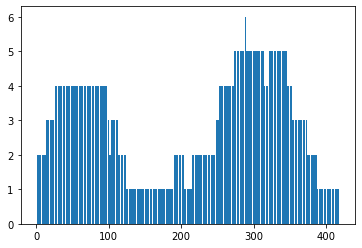

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

frequency = [0] * len(sequence)
for fragment in fragments:
    alignment = align(sequence, fragment, needleman_wunsch)
    for i, a in enumerate(alignment[1]):
        if a != '-':
            frequency[i] += 1

plt.bar(range(len(sequence)), frequency)

## Blast search parameters

![BLAST parameters](images/blast_search.png)

## Search results

![BLAST results](images/blast_results.png)